Statistical Learning Project

Data Description: The data at hand contains medical costs of people characterized by certain attributes.

Domain: Healthcare

Context: Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

Attribute Information:

1. age: age of primary beneficiary
2. sex: insurance contractor gender, female, male
3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^2) using the ratio of height to weight, ideally 18.5 to 24.9
4. children: Number of children covered by health insurance / Number of dependents
5. smoker: Smoking
6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
7. charges: Individual medical costs billed by health insurance

Learning Outcomes:
1. Exploratory Data Analysis
2. Practicing statistics using Python
3. Hypothesis testing
 
Objective:

We want to see if we can dive deep into this data to find some valuable insights.

## 1. Import the necessary libraries

In [33]:
# 1. importing the necessary libraries

import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import statsmodels.api as sm

from scipy.stats import chi2
from statsmodels.formula.api import ols
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_color_codes("dark")

## 2. Read the data as dataframe

In [35]:
# 2. the data as a data frame
insurance_df = pd.read_csv("insurance.csv")

In [36]:
# getting a view of the data frame
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Performing basic EDA

### 3.a. Finding the shape of the data

In [37]:
# 3.a. finding the shape(cols & rows) of the dataframe
insurance_df.shape

(1338, 7)

### 3.b. Data type of each attribute

In [38]:
# 3.b. finding the data types
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### 3.c. Checking for missing values in the dataframe 

In [39]:
# 3.c. Checking for missing values in the dataframe 
insurance_df.isnull().any() 

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

#### False suggests there are no missing values 

In [40]:
# it can also be done using 
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Sum of zeros suggests there are no missing values 

### 3.d. 5 Point summary of numerical attributes

In [52]:
# dropping children column as it is a categorical variable

insurance_df_numeric = insurance_df.drop('children', axis=1)
insurance_df_numeric.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


### 3.e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

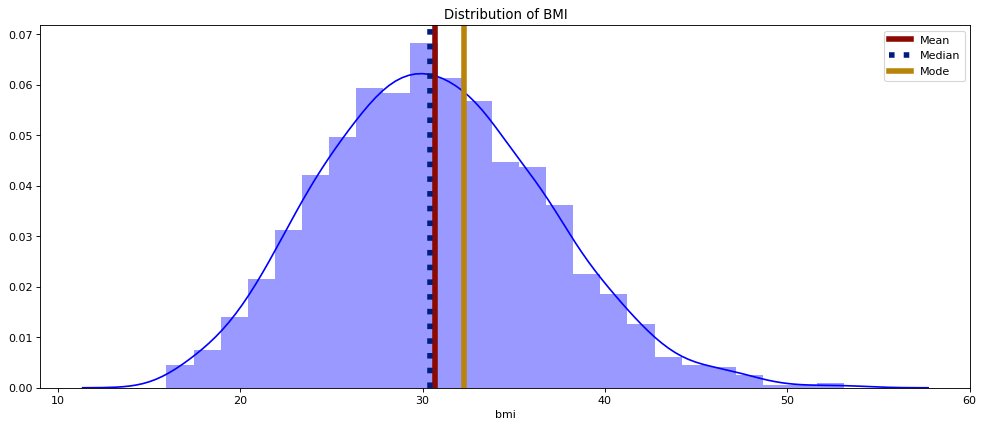

In [53]:
# adding the mean, median & mode (measures of central tendencies) to the chart

bmi_mean = insurance_df['bmi'].mean()
bmi_median = insurance_df['bmi'].median()
bmi_mode = insurance_df['bmi'].mode()

# setting plot values and styling 

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.distplot(insurance_df['bmi'], color='blue')
ax.axvline(bmi_mean, color = 'r', linestyle = '-', linewidth = '5', label = 'Mean')
ax.axvline(bmi_median, color = 'b', linestyle = ':', linewidth = '5', label = 'Median')
ax.axvline(bmi_mode[0], color = 'y', linestyle = '-', linewidth = '5', label = 'Mode')
ax.set_title(r'Distribution of BMI')
ax.legend()

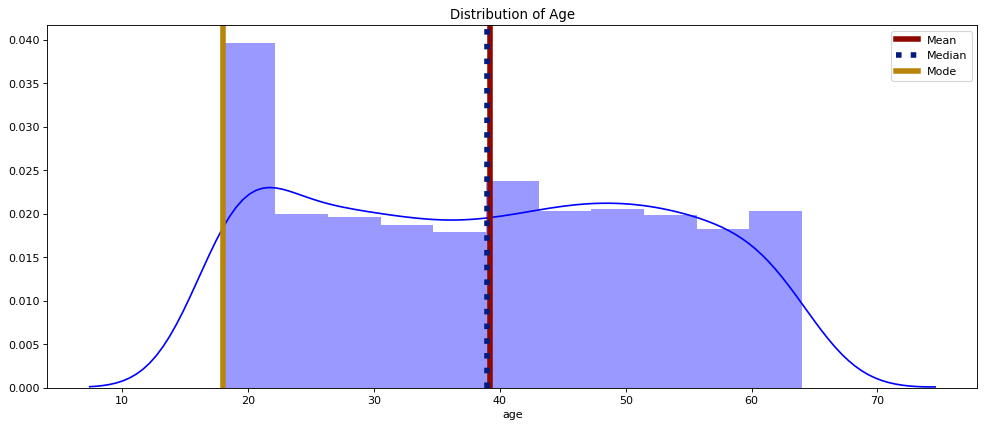

In [56]:
# adding the mean, median & mode (measures of central tendencies) to the chart

age_mean = insurance_df['age'].mean()
age_median = insurance_df['age'].median()
age_mode = insurance_df['age'].mode()

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.distplot(insurance_df['age'], color='blue')
ax.axvline(age_mean, color = 'r', linestyle = '-', linewidth = '5', label = 'Mean')
ax.axvline(age_median, color = 'b', linestyle = ':', linewidth = '5', label = 'Median')
ax.axvline(age_mode[0], color = 'y', linestyle = '-', linewidth = '5', label = 'Mode')
ax.set_title(r'Distribution of Age')
ax.legend()


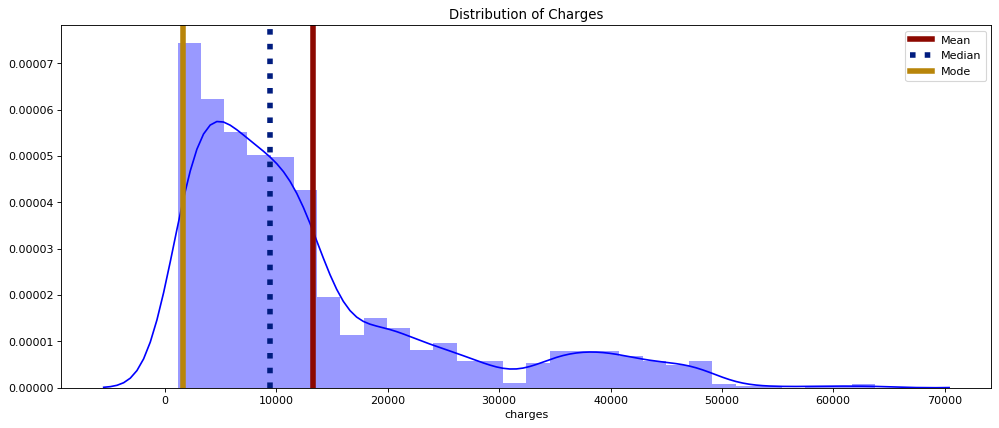

In [55]:
# adding the mean, median & mode (measures of central tendencies) to the chart

charges_mean = insurance_df['charges'].mean()
charges_median = insurance_df['charges'].median()
charges_mode = insurance_df['charges'].mode()

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.distplot(insurance_df['charges'], color='blue')
ax.axvline(charges_mean, color = 'r', linestyle = '-', linewidth = '5', label = 'Mean')
ax.axvline(charges_median, color = 'b', linestyle = ':', linewidth = '5', label = 'Median')
ax.axvline(charges_mode[0], color = 'y', linestyle = '-', linewidth = '5', label = 'Mode')
ax.set_title(r'Distribution of Charges')
ax.legend()

### 3.f. EDA - Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [57]:
insurance_df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

#### As it can be observed, the distribution of age is marginally positively skewed, so is bmi while charges are a lot skewed positively. 

## 3.g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

Text(0.5, 1.0, 'Outliers in BMI')

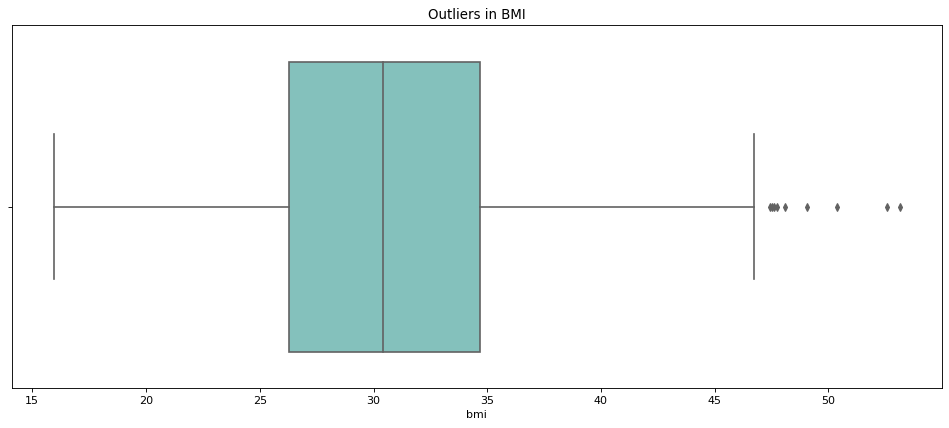

In [58]:
# checking for outliers in BMI

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(insurance_df['bmi'], palette = 'GnBu').set_title('Outliers in BMI')

#### It can be seen from the plot there outliers for BMI > 45 

In [59]:
# Having extablished there are outliers in BMI distribution, lets check the values. 
# By definition Outliers lie beyond 1.5 times of IQR beyond the first Quartile and the third Quartile

# calculating the IQR

Q3 = insurance_df.bmi.quantile(0.75)
Q1 = insurance_df.bmi.quantile(0.25)
IQR = Q3 - Q1
display(insurance_df.loc[(insurance_df.bmi < (Q1 - 1.5 * IQR)) | (insurance_df.bmi > (Q3 + 1.5 * IQR))])

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


#### As observed there are 9 values which are outliers for BMI

Text(0.5, 1.0, 'Outliers in Age')

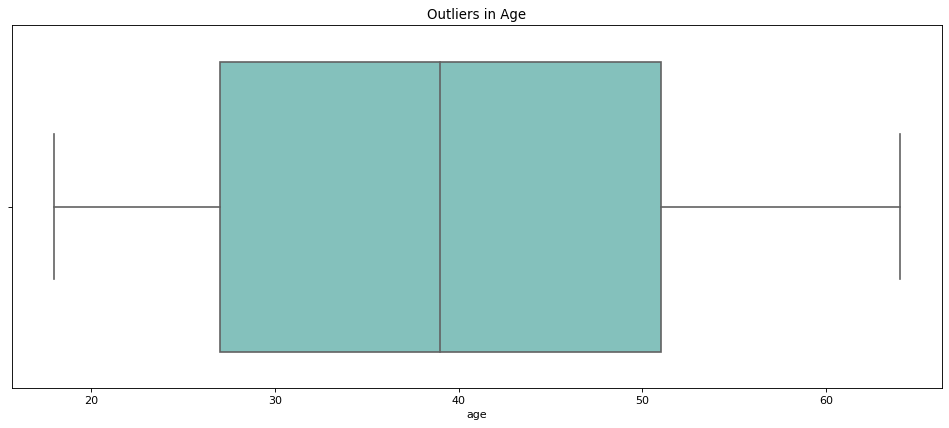

In [60]:
# checking for outliers in Age

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(insurance_df['age'], palette = 'GnBu').set_title('Outliers in Age')

#### From the plot there are no outliers for Age 

Text(0.5, 1.0, 'Outliers in Charges')

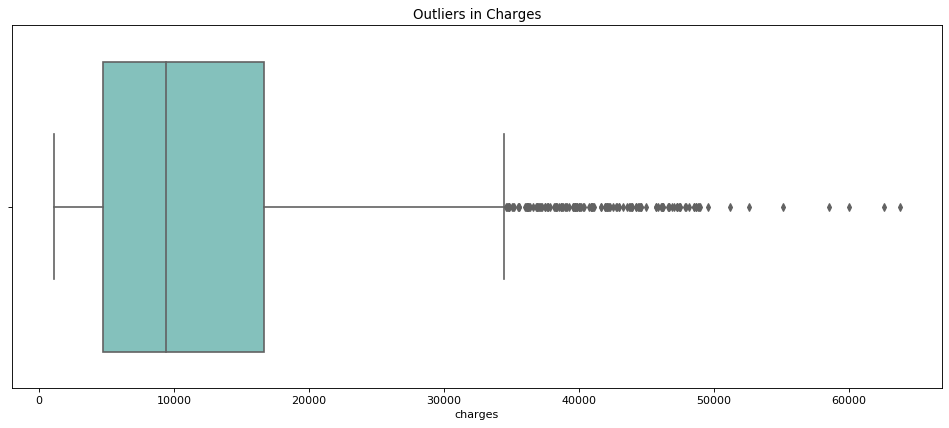

In [61]:
# checking for outliers in Charges

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(insurance_df['charges'], palette = 'GnBu').set_title('Outliers in Charges')

#### For charges > 35000(approx) we can see a lot of values as outliers 

In [62]:
# calculating the IQR

Q3 = insurance_df.charges.quantile(0.75)
Q1 = insurance_df.charges.quantile(0.25)
IQR = Q3 - Q1
display(insurance_df.loc[(insurance_df.charges < (Q1 - 1.5 * IQR)) | (insurance_df.charges > (Q3 + 1.5 * IQR))])

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


#### As observed there are a 139 values which are outliers for Charges

## 3.h. Distribution of categorical columns (include children)

#### Plotting a count distribution of sex data with smoker as hue 

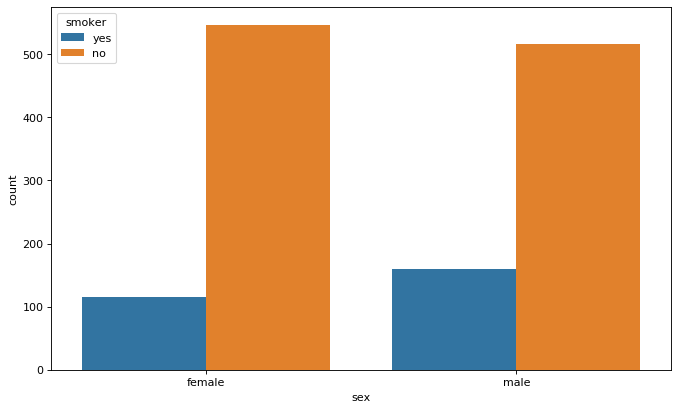

In [63]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='sex', data = insurance_df, hue = 'smoker')

#### Plotting a count distribution of region data with smoker as hue 

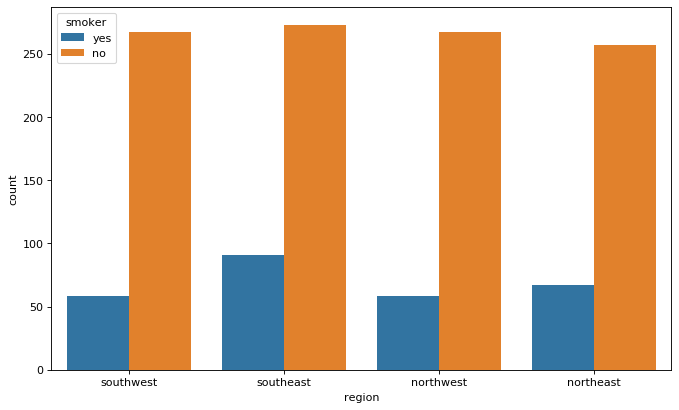

In [64]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='region', data = insurance_df, hue = 'smoker')

#### Plotting a count distribution of smokers vs non-smokers 

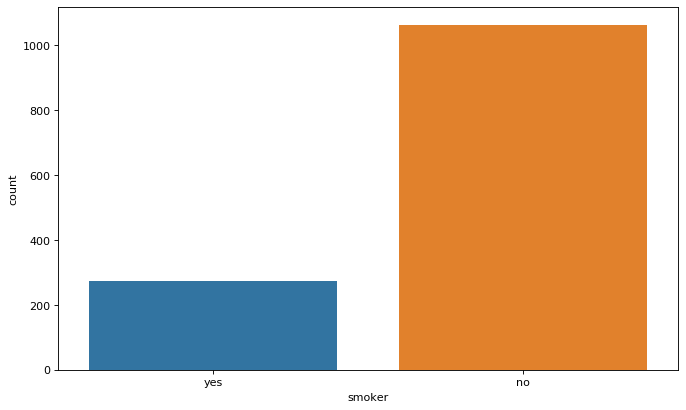

In [65]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='smoker', data = insurance_df)

#### Plotting a count distribution of children data with smoker as hue 

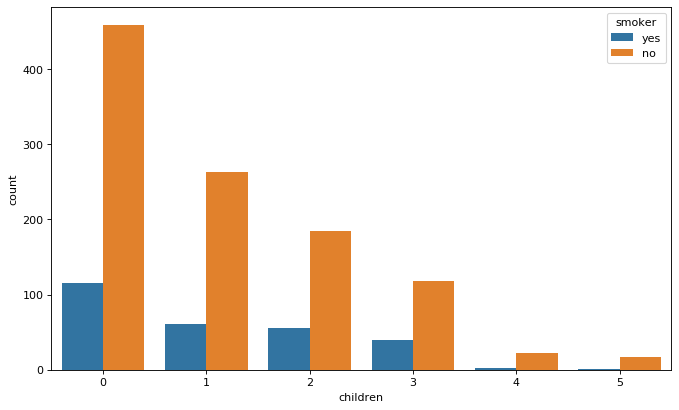

In [66]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='children', data = insurance_df, hue = 'smoker')

## 3.i. Pair plot that includes all the columns of the data frame

#### Plotting a distribution of all columns with smoker as hue 

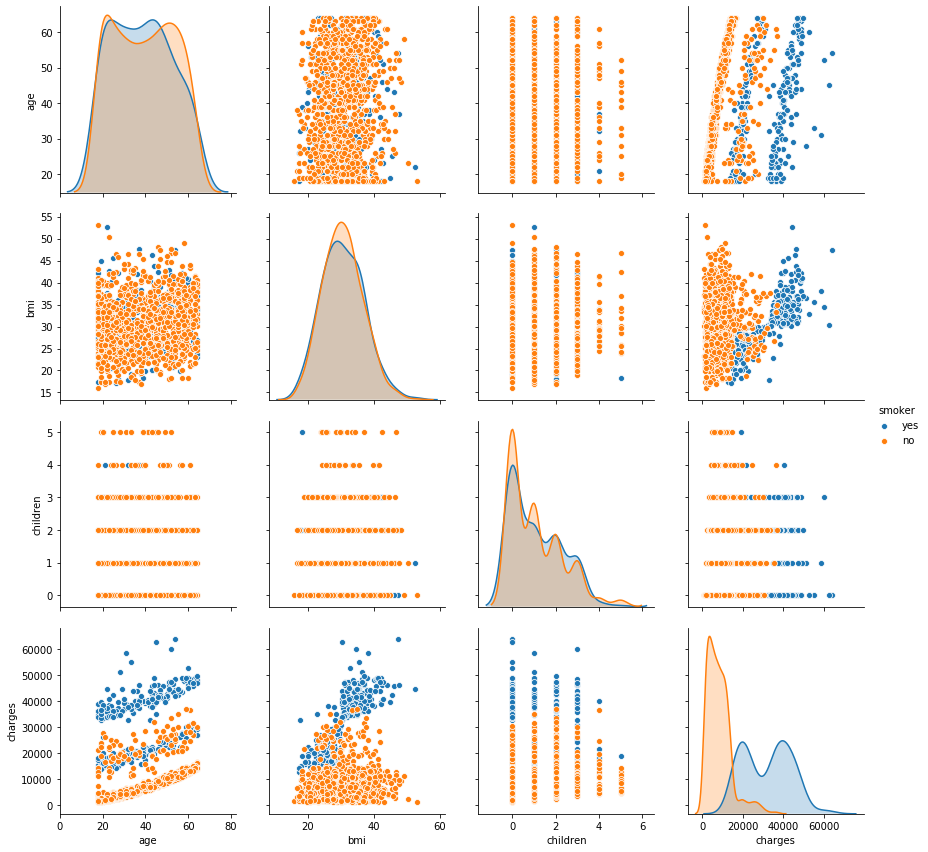

In [67]:
sns.pairplot(insurance_df[:], height=3, hue = 'smoker')

#### Plotting a distribution of all columns with region as hue 

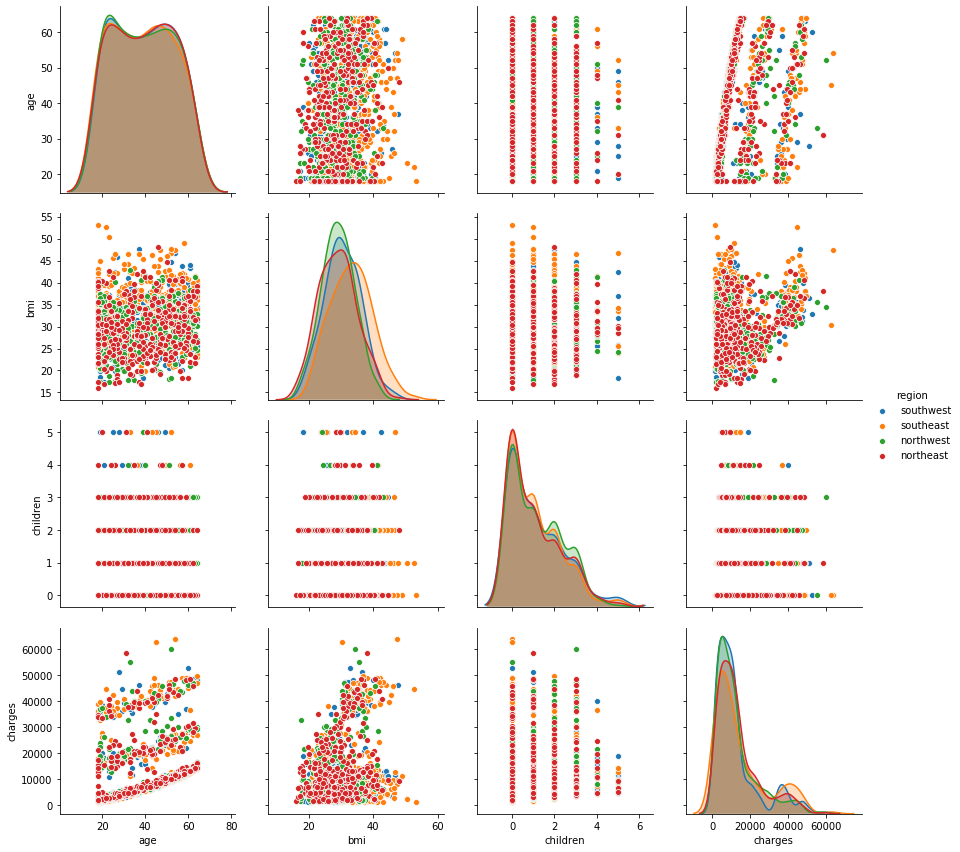

In [68]:
sns.pairplot(insurance_df[:], height=3, hue = 'region')

#### Plotting a distribution of all columns with sex as hue 

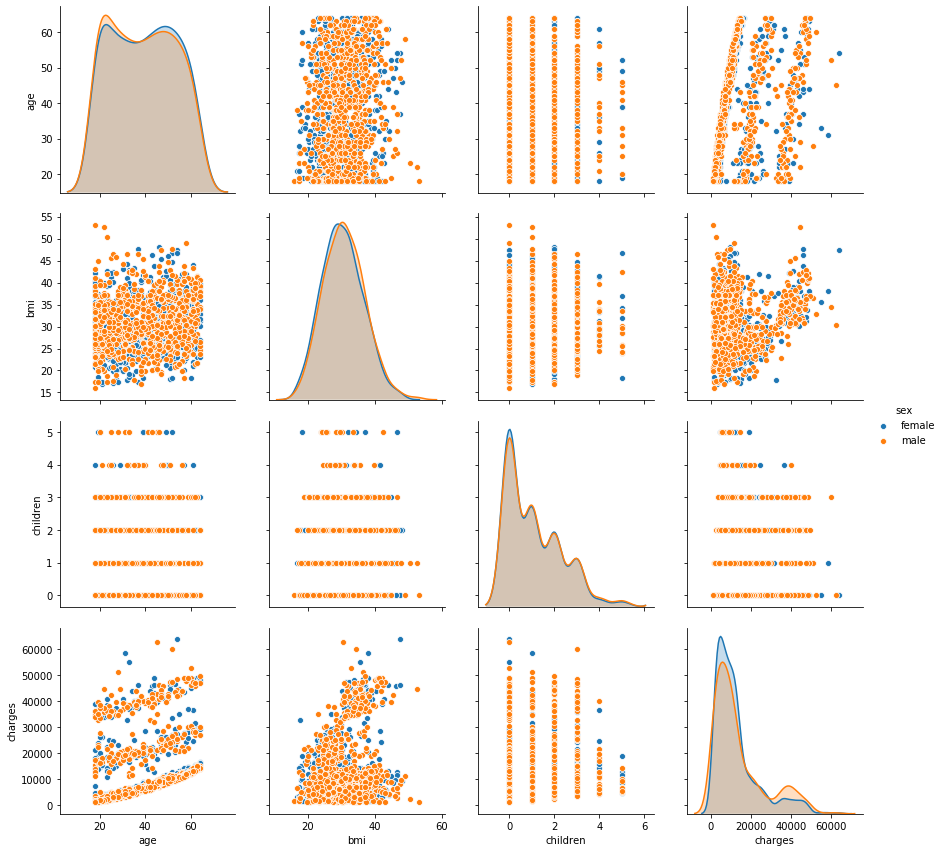

In [69]:
sns.pairplot(insurance_df[:], height=3, hue = 'sex')

## 4.a. Do charges of people who smoke differ significantly from the people who don't?

#### Exploring the data graphically

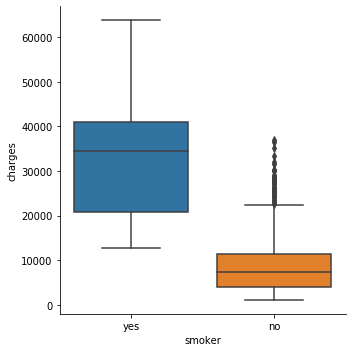

In [70]:
sns.catplot(x = 'smoker', y = 'charges', data = insurance_df, kind = 'box')

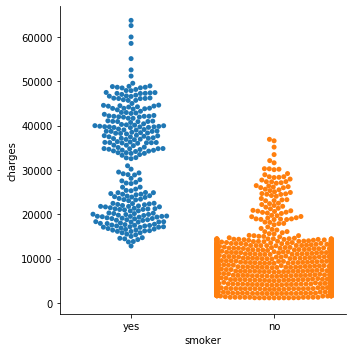

In [71]:
sns.catplot(x = 'smoker', y = 'charges', data = insurance_df, kind = 'swarm')

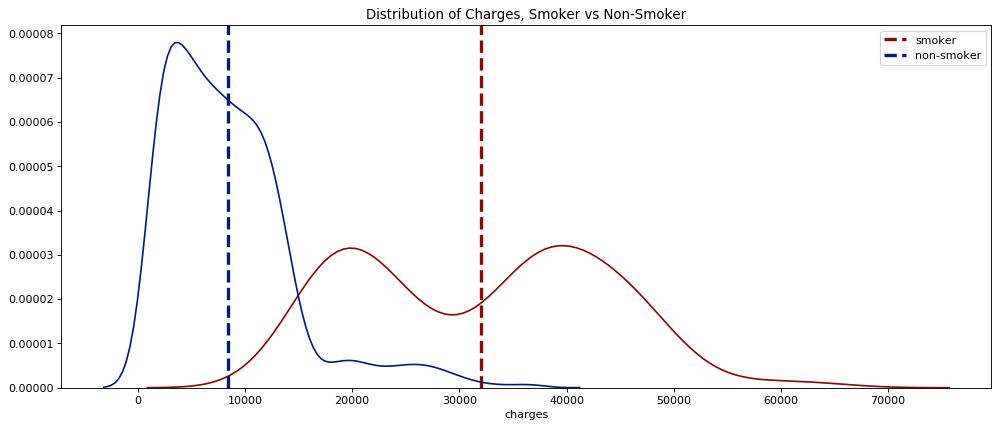

In [72]:
smoker = insurance_df.query('smoker == "yes"')
non_smoker = insurance_df.query('smoker == "no"')
                    
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')                    

ax = sns.distplot(smoker['charges'], hist = False, color = 'r')
ax.axvline(smoker['charges'].mean(),color = 'r', linestyle = '--', linewidth = '3', label = 'smoker')

ax = sns.distplot(non_smoker['charges'], hist = False,color = 'b' )
ax.axvline(non_smoker['charges'].mean(),color = 'b', linestyle = '--', linewidth = '3', label = 'non-smoker')

ax.set_title(r'Distribution of Charges, Smoker vs Non-Smoker')
ax.legend()

#### It can be observed from the plots there is a significant difference in charges of people who smoke vs people who don't smoke

#### Step 1: State the null and alternative hypothesis:

Null hypothesis: 

     H0 : Charges of people who smoke does not differ from people who dont 

Alternative Hypothesis:

     H1 : Charges of people who smoke differ significantly from people who don't

#### Step 2: Decide the significance level


Here we select α = 0.05

#### Step 3: Identify the test statistic

A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features.

#### Step 4: Performing the T-test

In [284]:
t, p_value = stats.ttest_ind((smoker['charges']),(non_smoker['charges']))
p_value

8.271435842177219e-283

#### Step 5:  Decide to reject or accept null hypothesis

In this dataset, 
* p value is close to 0 or < 0.001 so we reject the null hypothesis and conclude that Charges of people who smoke differ significantly from people who don't

## 4.b. Does bmi of males differ significantly from that of females

#### Exploring the data graphically

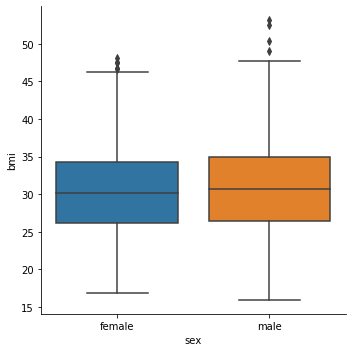

In [73]:
sns.catplot(x = 'sex', y = 'bmi', data = insurance_df, kind = 'box' )

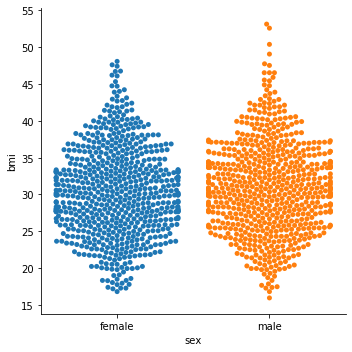

In [74]:
sns.catplot(x = 'sex', y = 'bmi', data = insurance_df, kind = 'swarm' )

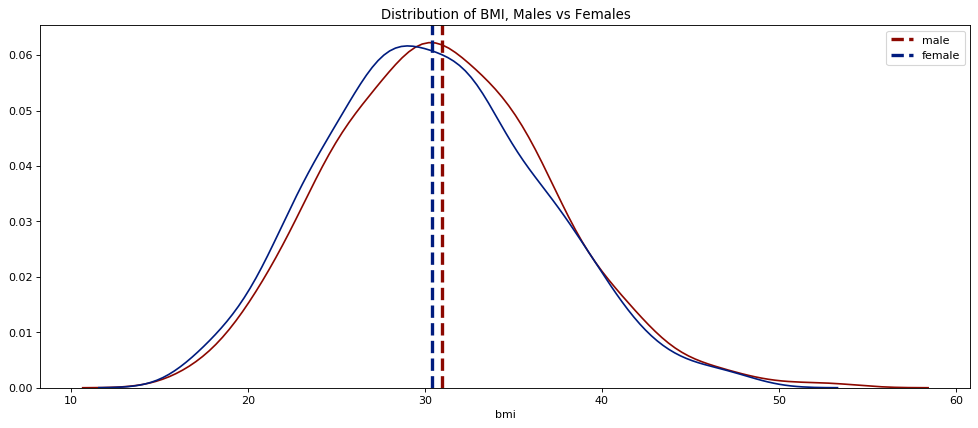

In [75]:
males = insurance_df.query('sex == "male"')
females = insurance_df.query('sex == "female"')
                    
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')                    

ax = sns.distplot(males['bmi'], hist = False, color = 'r')
ax.axvline(males['bmi'].mean(),color = 'r', linestyle = '--', linewidth = '3', label = 'male')

ax = sns.distplot(females['bmi'], hist = False,color = 'b' )
ax.axvline(females['bmi'].mean(),color = 'b', linestyle = '--', linewidth = '3', label = 'female')

ax.set_title(r'Distribution of BMI, Males vs Females')
ax.legend()

#### It can be observed from the plots there is not a significant difference in the BMI's of males vs females 

#### Step 1: State the null and alternative hypothesis:

Null hypothesis: 

     H0 : BMI of males does not differ significantly from females

Alternative Hypothesis:

     H1 : BMI of males differ significantly from females 

#### Step 2: Decide the significance level

Here we select α = 0.05

#### Step 3: Identify the test statistic

A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features.

#### Step 4: Performing the T-test

In [76]:
t, p_value = stats.ttest_ind((males['bmi']), (females['bmi']))
p_value

0.08997637178984932

#### Step 5:  Decide to reject or accept null hypothesis

In this example, 
* p value is 0.09 and > 0.05 so we fail to reject the null hypothesis and conclude that the BMI of males does not differ significantly from females


## 4.c. Is the proportion of smokers significantly different in different genders?

#### Step 1: State the null and alternative hypothesis:

Null hypothesis:
   
     H0: Proportion of smokers in male and female are equal
     
Alternative Hypothesis:
   
     H1: Proportion of smokers is significantly different in male and female

#### Step 2: Test of proportions

In [77]:
# calculating the proportions 

smokers_female_count = len((insurance_df.query('smoker == "yes" and sex == "female"').index))
female_count = len((insurance_df.query('sex == "female"').index))

smokers_male_count = len((insurance_df.query('smoker == "yes" and sex == "male"').index))
male_count = len((insurance_df.query('sex == "male"').index))

In [78]:
# comparing the proportions

# % of smokers among females
prp_female = round((smokers_female_count/female_count),4)*100

# % of smokers among males 
prp_male = round((smokers_male_count/male_count),4)*100

print(f'Proportion of smokers in females = {prp_male}% and males = {prp_female}% respectively')


Proportion of smokers in females = 23.52% and males = 17.37% respectively


The proportions are different but are they statistically significant? Check for the test statistic 

#### Step 3: Identify the test statistic

 The test statistic is a z-score (z).

#### Step 4: Performing the Z-test for proportions

In [79]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([smokers_female_count, smokers_male_count] , [female_count, male_count])

pval

0.005324114164320532

#### Step 5:  Decide to reject or accept null hypothesis

In this data, 
* p value is 0.0053 and < 0.05 so we reject the null hypothesis and conclude that the proportion of smokers is significantly different in males and females


### Checking if smoker and gender are indpendent and does it influence the previous outcome using proportions

#### Step 1: State the null and alternative hypothesis

Null hypotheses: 

    H0: Smoker and Sex are dependent 

Alternative Hypothesis:

    H1: Smoker and Sex are independent

#### Step 2: Decide the significance level

Here we select α = 0.05

#### Step 3: Identify the test statistic


We use the chi-square test of independence to find out the difference of categorical variables

#### Step 4: Calculate p value using Chi-square test

In [81]:
contingency_table = pd.crosstab(insurance_df['sex'], insurance_df['smoker'])
chi_sq_Stat, p_value,deg_freedom, exp_freq = stats.chi2_contingency(contingency_table)
critical_value = chi2.ppf(1-0.05, 1)

In [83]:
print('Chi-square statistic = %3.5f, P value = %1.6f and Degrees of freedom = %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic = 7.39291, P value = 0.006548 and Degrees of freedom = 1


#### Step 5:  Decide to reject or accept null hypothesis

In this data, 
* p value is 0.0065 and < 0.05 so we reject the null hypothesis and conclude that smoker and sex are independent


#### Summary 

It can be concluded that the proportion of males and females are significantly different and also gender and sex are independent of each other

## 4.d. Is the distribution of bmi across women with no children, one child and two children, the same

#### Exploring the data graphically

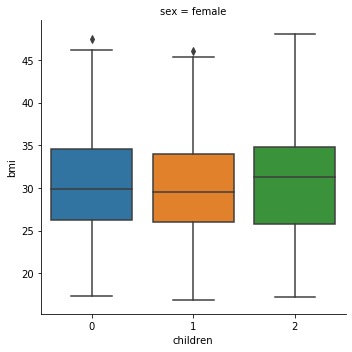

In [259]:
sns.catplot(x="children", y="bmi", row="sex",
                kind="box", data=insurance_df.query('children < 3 and sex == "female"'))

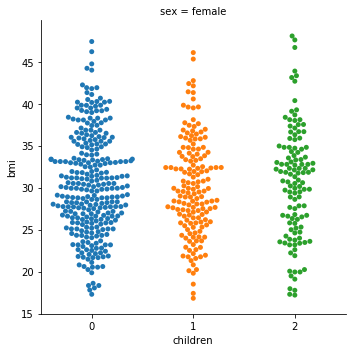

In [194]:
sns.catplot(x = 'children', y = 'bmi', kind = 'swarm', col = 'sex', 
            data = insurance_df.query('children < 3 and sex == "female"'))

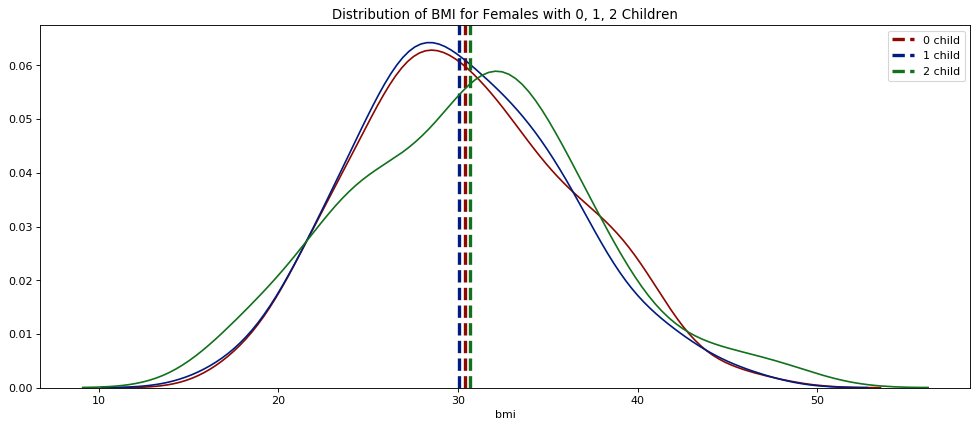

In [84]:
females_no_child = insurance_df.query('children == 0 and sex == "female"')
females_one_child = insurance_df.query('children == 1 and sex == "female"')
females_two_child = insurance_df.query('children == 2 and sex == "female"')
                    
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')                    

ax = sns.distplot(females_no_child['bmi'], hist = False, color = 'r')
ax.axvline(females_no_child['bmi'].mean(),color = 'r', linestyle = '--', linewidth = '3', label = '0 child')

ax = sns.distplot(females_one_child['bmi'], hist = False,color = 'b' )
ax.axvline(females_one_child['bmi'].mean(),color = 'b', linestyle = '--', linewidth = '3', label = '1 child')

ax = sns.distplot(females_two_child['bmi'], hist = False, color = 'g')
ax.axvline(females_two_child['bmi'].mean(),color = 'g', linestyle = '--', linewidth = '3', label = '2 child')

ax.set_title(r'Distribution of BMI for Females with 0, 1, 2 Children')
ax.legend()

##### from the graphic the means look closer to each other 

#### Step 1: State the null and alternative hypothesis:

Null hypotheses: 

    All pairs of samples are same i.e. all sample means are equal 

Alternative Hypothesis:

    At least one pair of samples is significantly different 

#### Step 2: Decide the significance level

Here we select α = 0.05

#### Step 3: Identify the test statistic


ANOVA, also known as analysis of variance, is used to compare multiple (three or more) samples with a single test.

#### Step 4: Calculate p value using ANOVA table

In [85]:
model = ols('bmi ~ children', data = insurance_df.query('sex == "female" and children < 3')).fit()

# ANOVA table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


#### Step 5:  Decide to reject or accept null hypothesis

In this data, 
* p value is 0.79376 and > 0.05 so we fail to reject the null hypothesis and conclude that the distribution of BMI across women with no children, 1 child and 2 children are same


#### References

1. https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html?highlight=chi2%20ppf
3. https://seaborn.pydata.org/index.html
4. https://www.medcalc.org/manual/chi-square-table.php